# 10.10.2024

# Набор даннных march_may1

## Загрузка данных


Data loaded 1st part - tail:               Date     Time  Temperature  Humidity  Pressure  Dew-point  СО2  \
384609  03.11.2024  2:44:38        33.91     26.36    708.77      11.90    0   
384610  03.11.2024  2:44:42        33.91     26.36    708.79      11.90    0   
384611  03.11.2024  2:44:50        33.92     26.36    708.78      11.90    0   
384612  03.11.2024  2:45:00        33.93     26.32    708.78      11.88  400   
384613  03.11.2024  2:45:09        33.94     26.21    708.76      11.83  400   

        TVOC  Aftershocks  Voltage  ...  Temp outside  Humidity outside  \
384609     0          653      0.0  ...          0.00              0.00   
384610     0          653      0.0  ...          0.00              0.00   
384611     0          654      0.0  ...          0.00              0.00   
384612     0        60694    236.6  ...          9.73             63.54   
384613     0        65100    236.7  ...          9.76             63.21   

        Pressure outside  Dew-point ou

/var/folders/kt/r21h4r1j28xgpcsbx35gbs7h0000gn/T/ipykernel_50313/2793420648.py:35: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2['Voltage'].iloc[mask] = 0
/var/folders/kt/r21h4r1j28xgpcsbx35gbs7h0000gn/T/ipykernel_50313/2793420648.py:35:

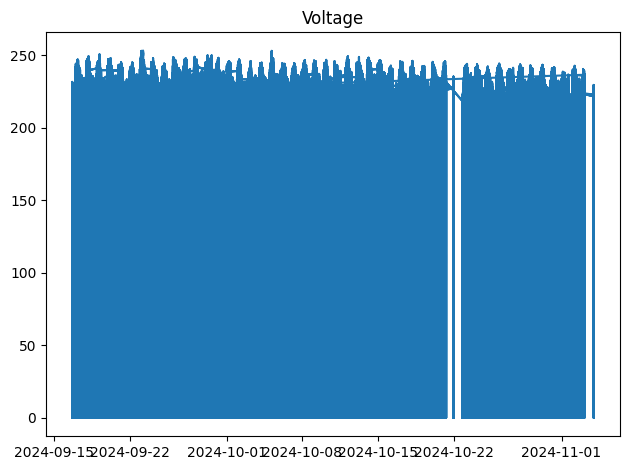

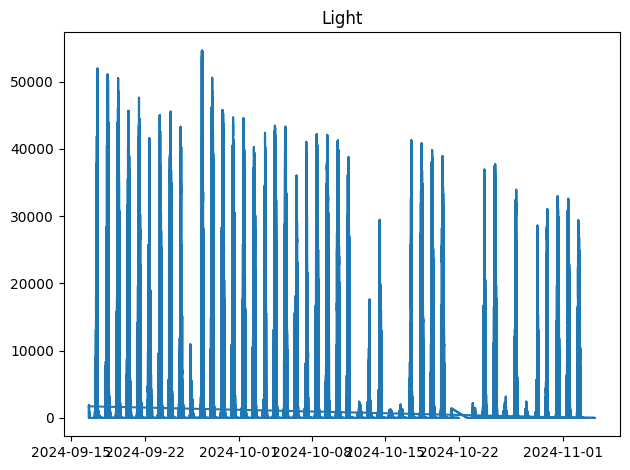

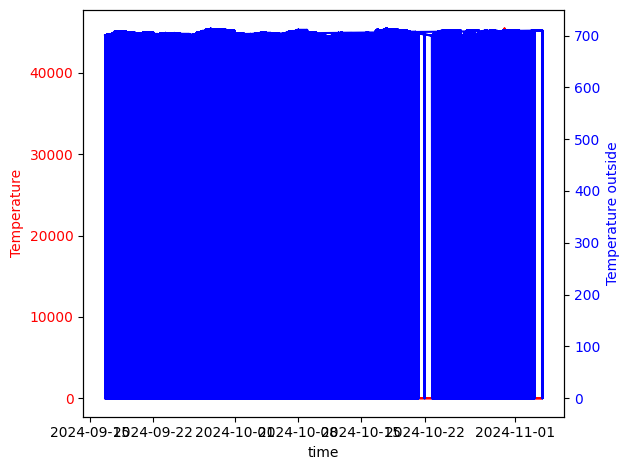



Cleaning data:
Cleaning  Temperature
Cleaning  Humidity
Cleaning  Pressure
Cleaning  Dew-point
Cleaning  СО2
Cleaning  TVOC
Cleaning  Aftershocks
Cleaning  Voltage
Cleaning  Current
Cleaning  Power
Cleaning  Energy
Cleaning  Temp outside
Cleaning  Humidity outside
Cleaning  Pressure outside
Cleaning  Dew-point outside
Cleaning  СО2 outside
Cleaning  X
Cleaning  Y
Cleaning  Z
Cleaning  UV-radiation
Cleaning  Light
Cleaning  Date Time


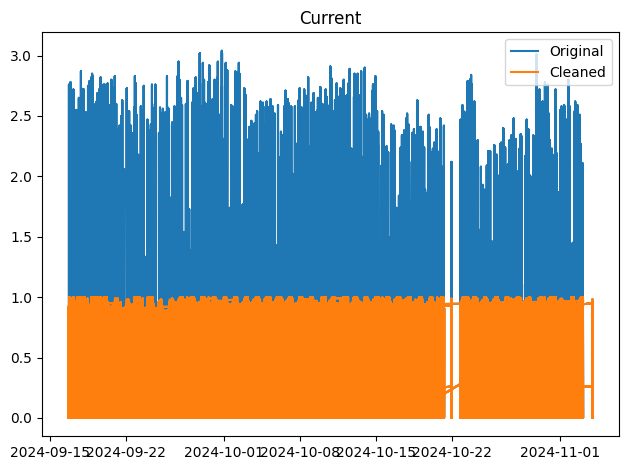

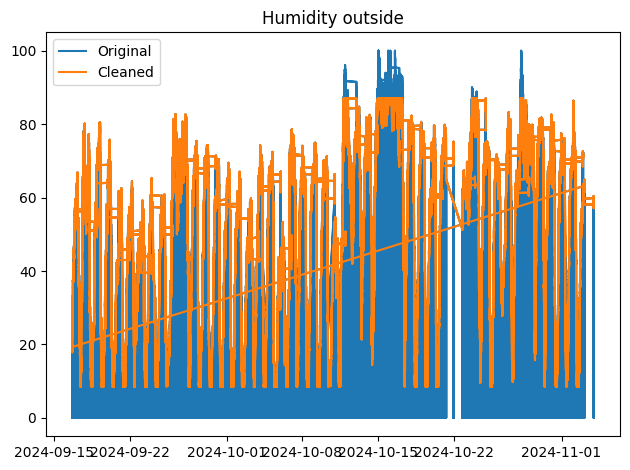

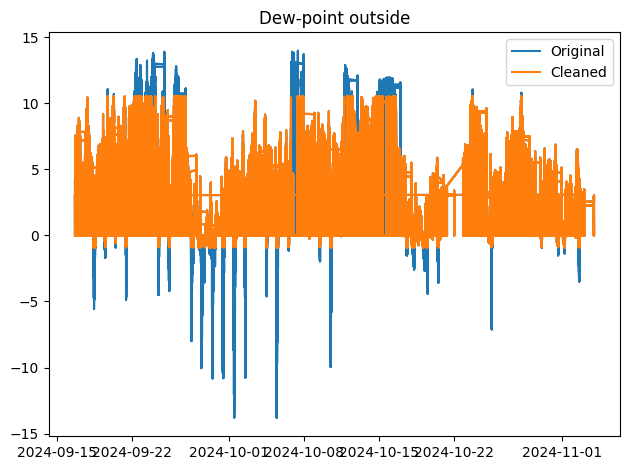


Stats for  Temperature
Minimum Maximum Mean STD
19.79 45443.0

Stats for  Temperature
Minimum Maximum Mean STD
19.79 35.74

Stats for  Dew-point outside
Minimum Maximum Mean STD
-0.9 10.54
Non-numeric columns: Index(['Date', 'Time'], dtype='object')
Correlation matrix:
                   Temperature  Humidity  Pressure  Dew-point  СО2  TVOC  \
Temperature                NaN       NaN       NaN        NaN  NaN   NaN   
Humidity                   NaN       NaN       NaN        NaN  NaN   NaN   
Pressure                   NaN       NaN       NaN        NaN  NaN   NaN   
Dew-point                  NaN       NaN       NaN        NaN  NaN   NaN   
СО2                        NaN       NaN       NaN        NaN  NaN   NaN   
TVOC                       NaN       NaN       NaN        NaN  NaN   NaN   
Aftershocks                NaN       NaN       NaN        NaN  NaN   NaN   
Voltage                    NaN       NaN       NaN        NaN  NaN   NaN   
Current                    NaN       NaN     

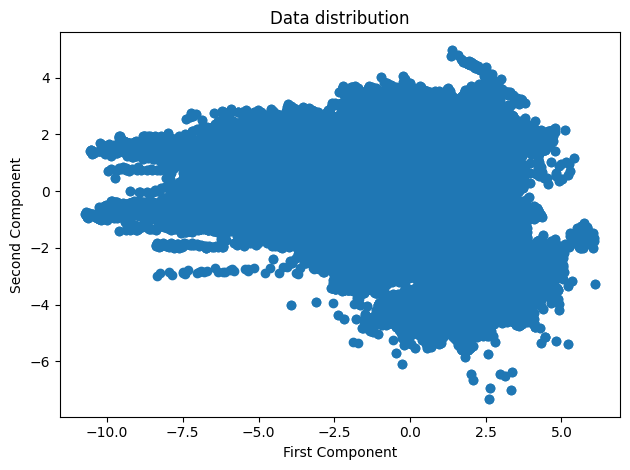

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

dfp1 = pd.read_csv('COUNTRY HOUSE - Лист1 (4).csv', sep=',', header=0, encoding='utf-8')
 
print('')
print('Data loaded 1st part - tail:', dfp1.tail())
 
# Join date and time in the same string
dfp1['Date Time'] = dfp1['Date']+' '+dfp1['Time']
 
# Convert date and time from sring to datetime   <--- In this dataset only dot is used
dfp1['Datetime'] = pd.to_datetime(dfp1['Date Time'], format='%d.%m.%Y %H:%M:%S')
 
dfp2 = dfp1.drop('Date Time', axis=1)

# In[]

# Merge into one dataframe
df = pd.concat([dfp1,dfp2])


# In[] Find non-numerics and remplace them

mask = pd.to_numeric(df['Voltage'], errors='coerce').isna()

print('Non-numeric values in Voltage (just to see):',mask.sum())
non_numerics = df[mask]
print(non_numerics)

# Replace non-numerics by nan
df2 = df.copy()
df2['Voltage'].iloc[mask] = 0
mask = pd.to_numeric(df2['Voltage'], errors='coerce').isna()
print('Non-numeric values in the cleaned Voltage:',mask.sum())

# In[] Plot just one variable

plt.plot(df2['Datetime'], df2['Voltage'].astype(float))
plt.title('Voltage')
#plt.xticks(rotation=45)  # Rotate the text if you want
plt.show()



# In[]

plt.figure()
plt.plot(df2['Datetime'], df2['Light'].astype(float))
plt.title('Light')
plt.show()

# In[] Treat non-numeric
plt.rcParams["figure.autolayout"] = True

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('time')
ax1.set_ylabel('Temperature',color = color)
ax1.plot(df2['Datetime'], df2['Temperature'].astype(float), color = color)
ax1.tick_params(axis='y',labelcolor = color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('Temperature outside',color = color)  # we already handled the x-label with ax1
ax2.plot(df2['Datetime'], df2['Pressure outside'].astype(float),color=color)
ax2.tick_params(axis='y',labelcolor=color)

#fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# In[]
'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
Data Cleaning
'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

''' plot clean and original data '''
def original_clean_plot(df,dfc,var):
    plt.plot(df['Datetime'], df[var],label = 'Original')
    plt.plot(dfc['Datetime'], dfc[var],label = 'Cleaned')
    plt.legend()
    plt.title(var)
    plt.show()

''' show statistics for one variable '''
def show_stats(df, var):
    print('\nStats for ',var)
    print('Minimum Maximum Mean STD')
    print(np.min(df[var].astype(float)), np.max(df[var].astype(float)) )

''' Clean all variables in the dataset and store result in new dataframe'''


def clean_data(df):
    print('\n\nCleaning data:')
    dfnumeric = df.copy()  # Dataframe cleaned from non-numeric 
    dfc = df.copy()  # Dataframe cleaned from non-numeric and discrepants
    for c in df.columns:
        if c in ['Date', 'Time', 'Datetime']:
            continue
        print('Cleaning ', c)

        mask = pd.to_numeric(df[c], errors='coerce').isna()
        # Replace non-numerics by nan
        dfc.loc[mask, c] = np.nan
        dfnumeric.loc[mask, c] = np.nan
        dfnumeric[c] = dfnumeric[c].astype(float)
        dfc[c] = dfc[c].astype(float)
        z = stats.zscore(dfc[c], nan_policy='omit')
        # Replace all samples where z > 1.5 by nan
        dfc.loc[np.abs(z) > 1.5, c] = np.nan
        dfc[c] = dfc[c].interpolate(method='linear')
    return dfnumeric, dfc


dfnumeric, dfcleaned = clean_data(df) # Dataframes cleaned from non-numeric and from discrepants too

# In[] Show plots

original_clean_plot(dfnumeric,dfcleaned,'Current')
plt.figure()
original_clean_plot(dfnumeric,dfcleaned,'Humidity outside')
plt.figure()
original_clean_plot(dfnumeric,dfcleaned,'Dew-point outside')


# In[] Show statistical values

show_stats(dfnumeric,'Temperature')
show_stats(dfcleaned,'Temperature')
show_stats(dfcleaned,'Dew-point outside')

# In[] Show correlation matrix

# Убедимся, что все ненумерические столбцы исключены
non_numeric_cols = dfcleaned.select_dtypes(include=['object']).columns
print('Non-numeric columns:', non_numeric_cols)

# Исключим ненумерические столбцы из DataFrame для расчета корреляционной матрицы
df_numeric = dfcleaned.drop(non_numeric_cols, axis=1)

# Убедимся, что в оставшихся столбцах нет NaN значений
df_numeric = df_numeric.dropna()

# Рассчитаем корреляционную матрицу
corr = df_numeric.corr()

print('Correlation matrix:')
print(corr)

# In[] PCA



from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Identify non-numeric columns
non_numeric_cols = dfcleaned.select_dtypes(include=['object']).columns
print('Non-numeric columns:', non_numeric_cols)

# Convert columns to numeric and drop non-numeric columns
dfcleaned = dfcleaned.apply(pd.to_numeric, errors='coerce')
dfcleaned = dfcleaned.dropna(axis=1, how='all')  # Drop columns with all NaN values

# Prepare data for PCA
dfpca = dfcleaned.drop(['Date', 'Time', 'Datetime'], axis=1, errors='ignore')
dfpca = dfpca.dropna()  # Ensure no NaN values remain

# Standardize features
scaler = StandardScaler()
dfpcasc = scaler.fit_transform(dfpca)

# Perform PCA
pca = PCA(n_components=4)
comp = pca.fit_transform(dfpcasc)

# Plot PCA components
plt.scatter(comp[:, 0], comp[:, 1])
plt.title('Data distribution')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()
# In[] k-means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt




## K-means

Centroids:
 [[-1.38803728 -0.15021463  0.16728434 -0.47208835]
 [ 1.39849278  0.15134613 -0.16854442  0.47564439]]


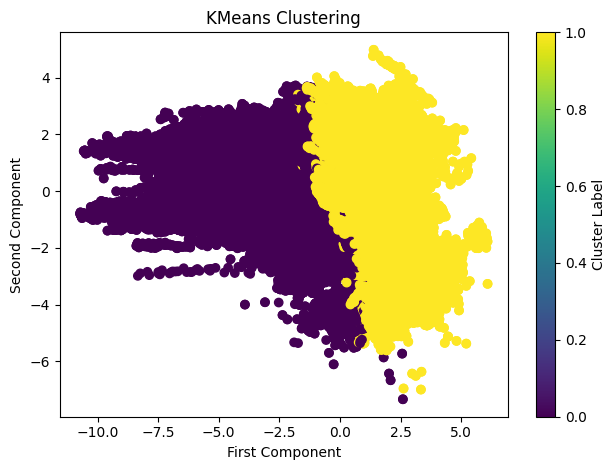

Centroids:
 [[-1.38682878 -0.15285119  0.16655803 -0.47212764]
 [ 1.3990057   0.15419329 -0.16802048  0.47627312]]


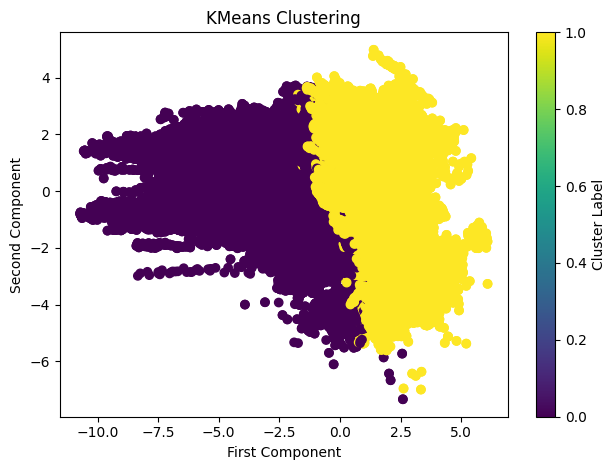

In [4]:
# Apply KMeans clustering
kmeans_model = KMeans(n_clusters=2, random_state=42)  # Добавлен random_state для воспроизводимости
kmeans_model.fit(comp)

print('Centroids:\n', kmeans_model.cluster_centers_)

# Plot KMeans clusters
plt.figure()
plt.scatter(comp[:, 0], comp[:, 1], c=kmeans_model.labels_, cmap='viridis')  # Отображаем по первым двум компонентам
plt.title('KMeans Clustering')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.colorbar(label='Cluster Label')
plt.show()
# In[] k-means

from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(comp)

print('Centroids:\n', kmeans_model.cluster_centers_)

# Plot KMeans clusters
plt.figure()
plt.scatter(comp[:, 0], comp[:, 1], c=kmeans_model.labels_, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.colorbar(label='Cluster Label')
plt.show()
# In[]
import pickle
import matplotlib.pyplot as plt



## Сохраненная модель Dbscan

In [5]:
# In[] Load pre-trained DBSCAN model
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Загрузка обученной модели
fname = 'country-house-dbscan-0.81.bin'

with open(fname, 'rb') as file:
    model = pickle.load(file)

# Выбор данных для анализа
# Поскольку компненты PCA уже подготовлены в переменной comp, возьмем часть данных для предсказания кластеров
l = int(len(comp) / 3 * 0.9)
chunk = comp[l: -l]

# Предсказание меток кластеров для данных
model.fit(chunk)

# In[] Cluster analysis
print('Predictions:\n', model.labels_)

# Визуализация кластеров
plt.figure()
#plt.scatter(chunk[:, 0], chunk[:, 1], c=model.labels_)
plt.scatter(chunk[:, 0], chunk[:, 1], c=model.labels_, s=50)

plt.title('DBSCAN Cluster Plot')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()


markers = ['o', 's', 'v', '^', '<', '>', 'p', '*', '+', 'x', 'D']
for cluster_id in set(model.labels_):
    if cluster_id == -1:
        # Шумовые точки
        plt.scatter(chunk[model.labels_ == cluster_id, 0], chunk[model.labels_ == cluster_id, 1], 
                    c='k', marker='x', label='Noise')
    else:
        plt.scatter(chunk[model.labels_ == cluster_id, 0], chunk[model.labels_ == cluster_id, 1], 
                    label=f'Cluster {cluster_id}', marker=markers[cluster_id % len(markers)], s=50)

plt.title('DBSCAN Cluster Plot')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.legend()
plt.show()




# In[] Cluster analysis
nclusters = set(model.labels_)
print('Number of clusters formed: ', len(nclusters) - 1)

# Печать информации по каждому кластеру
for j in nclusters:
    print('Points in cluster', j, ':', len(model.labels_[model.labels_ == j]))

print('Out of clusters: ', len(model.labels_[model.labels_ == -1]))

# In[] Statistical parameters per cluster
chunk = dfpca[l: -l]  # Выбор той же части данных для дальнейшего анализа

for j in nclusters:
    print('Cluster', j)
    cluster = chunk[model.labels_ == j]
    print(cluster.describe())

# Получение описательной статистики для конкретных кластеров
cluster1 = chunk[model.labels_ == 0]
cluster1data = cluster1.describe()

cluster2 = chunk[model.labels_ == 1]
cluster2data = cluster2.describe()

cluster3 = chunk[model.labels_ == 2]
cluster3data = cluster3.describe()

nocluster = chunk[model.labels_ == -1]
noclusterdata = nocluster.describe()


FileNotFoundError: [Errno 2] No such file or directory: 'country-house-dbscan-0.81.bin'

## Попытка обучить DBSCAN

Predictions:
 [0 0 0 ... 0 0 0]


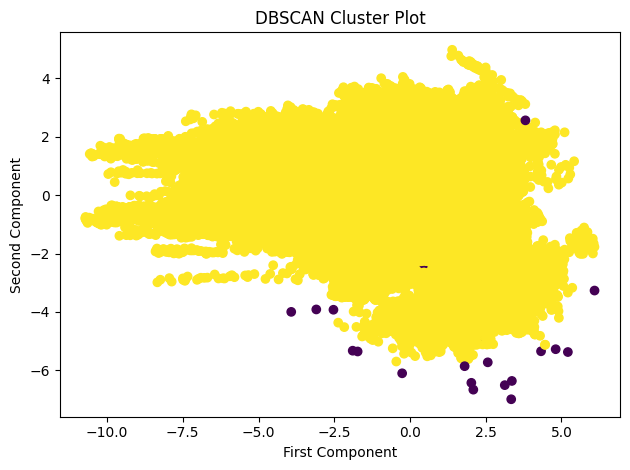

Number of clusters formed:  1
Points in cluster 0 : 307638
Points in cluster -1 : 26
Out of clusters:  26
Cluster 0
         Temperature       Humidity       Pressure      Dew-point  \
count  307638.000000  307638.000000  307638.000000  307638.000000   
mean       30.611657      28.381579     705.226279      10.140841   
std         2.539008       2.579700       3.127934       2.522947   
min        19.790000      17.760000     699.640000       3.410000   
25%        28.870000      27.290000     702.740000       8.040000   
50%        30.830000      28.530000     704.780000      10.130000   
75%        32.600000      29.580000     708.120000      12.120000   
max        35.740000      46.330000     710.010000      21.900000   

                 СО2           TVOC    Aftershocks        Voltage  \
count  307638.000000  307638.000000  307638.000000  307638.000000   
mean      402.562578       0.248090   65133.733742     226.029978   
std         9.824466       1.063096     984.221056     

In [19]:
# In[] Import necessary libraries
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

# In[] Train DBSCAN model on data

# x: Data, y: Labels
model = DBSCAN(eps=1.1, min_samples=5)

# Получим часть данных для ускорения DBSCAN
l = int(len(comp) / 3 * 0.9)
chunk = comp[l: -l]

# Обучим модель DBSCAN на выбранной части данных
model.fit(chunk)

# In[] Cluster analysis
print('Predictions:\n', model.labels_)

# Визуализация кластеров
plt.figure()
plt.scatter(chunk[:, 0], chunk[:, 1], c=model.labels_)
plt.title('DBSCAN Cluster Plot')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

# In[] Cluster analysis

# Определим количество кластеров
nclusters = set(model.labels_)
print('Number of clusters formed: ', len(nclusters) - 1)

# Печать информации по каждому кластеру
for j in nclusters:
    print('Points in cluster', j, ':', len(model.labels_[model.labels_ == j]))

print('Out of clusters: ', len(model.labels_[model.labels_ == -1]))

# In[] Statistical parameters per cluster

# Используем ту же часть данных для анализа
chunk = dfpca[l: -l]

# Выведем статистические параметры по каждому кластеру
for j in nclusters:
    print('Cluster', j)
    cluster = chunk[model.labels_ == j]
    print(cluster.describe())

# Получение описательной статистики для конкретных кластеров
cluster1 = chunk[model.labels_ == 0]
cluster1data = cluster1.describe()

cluster2 = chunk[model.labels_ == 1]
cluster2data = cluster2.describe()

cluster3 = chunk[model.labels_ == 2]
cluster3data = cluster3.describe()

nocluster = chunk[model.labels_ == -1]
noclusterdata = nocluster.describe()


## Измененная программа для обучени dbscan. включены параметры eps и min_samples. 
## Умньшенная выборка из-за memory error


Predictions:
 [0 0 0 ... 0 0 0]


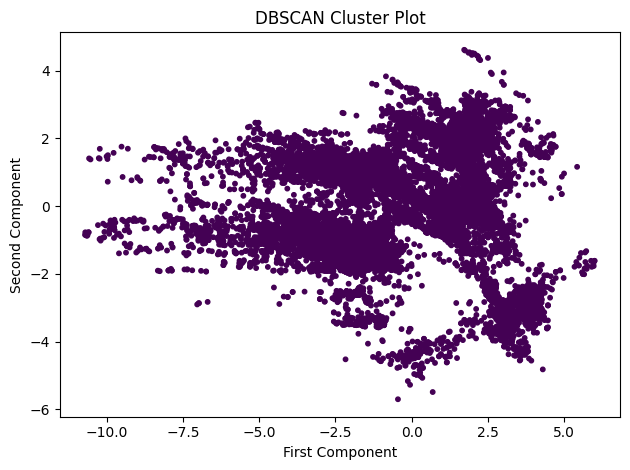

Number of clusters formed:  1
Points in cluster 0 : 23074
Out of clusters:  0
Cluster 0
        Temperature      Humidity      Pressure     Dew-point           СО2  \
count  23074.000000  23074.000000  23074.000000  23074.000000  23074.000000   
mean      30.187502     27.619222    705.864000      9.356034    405.536291   
std        1.741798      2.989434      2.575155      2.302881     13.819943   
min       24.370000     20.730000    699.740000      5.390000    400.000000   
25%       29.050000     25.490000    703.410000      7.810000    400.000000   
50%       30.080000     27.710000    706.850000      8.270000    400.000000   
75%       30.940000     29.470000    707.910000     10.690000    406.000000   
max       35.460000     45.070000    709.910000     21.320000    518.000000   

               TVOC   Aftershocks       Voltage       Current         Power  \
count  23074.000000  23074.000000  23074.000000  23074.000000  23074.000000   
mean       0.548507  65129.754518    224.8

In [29]:
# In[] Import necessary libraries
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.utils import resample

# In[] Train DBSCAN model on data

# Попробуем изменить параметры DBSCAN для получения двух крупных кластеров
model = DBSCAN(eps=20, min_samples=8)  # Увеличиваем eps и уменьшаем min_samples

# Получим часть данных для ускорения DBSCAN
l = int(len(comp) / 2 * 0.9)
chunk = comp[l: -l]

# Возьмем случайную подвыборку из chunk для уменьшения размера данных (например, 30%)
chunk_sampled = resample(chunk, n_samples=int(len(chunk) * 0.3), random_state=42)  # 30% выборки

# Обучим модель DBSCAN на выбранной части данных
model.fit(chunk_sampled)

# In[] Cluster analysis
print('Predictions:\n', model.labels_)

# Визуализация кластеров
plt.figure()
plt.scatter(chunk_sampled[:, 0], chunk_sampled[:, 1], c=model.labels_, cmap='viridis', s=10)
plt.title('DBSCAN Cluster Plot')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.show()

# In[] Cluster analysis

# Определим количество кластеров
nclusters = set(model.labels_)
nclusters.discard(-1)  # Исключаем шум (-1) из списка кластеров
print('Number of clusters formed: ', len(nclusters))

# Печать информации по каждому кластеру
for j in nclusters:
    print('Points in cluster', j, ':', len(model.labels_[model.labels_ == j]))

print('Out of clusters: ', len(model.labels_[model.labels_ == -1]))

# In[] Statistical parameters per cluster

# Используем ту же часть данных для анализа
chunk = dfpca[l: -l]
chunk_sampled = resample(chunk, n_samples=int(len(chunk) * 0.3), random_state=42)  # Тот же размер подвыборки

# Выведем статистические параметры по каждому кластеру
for j in nclusters:
    print(f'Cluster {j}')
    cluster = chunk_sampled[model.labels_ == j]
    print(cluster.describe())

# Получение описательной статистики для конкретных кластеров
if 0 in nclusters:
    cluster1 = chunk_sampled[model.labels_ == 0]
    cluster1data = cluster1.describe()
if 1 in nclusters:
    cluster2 = chunk_sampled[model.labels_ == 1]
    cluster2data = cluster2.describe()
if 2 in nclusters:
    cluster3 = chunk_sampled[model.labels_ == 2]
    cluster3data = cluster3.describe()

if -1 in nclusters:
    nocluster = chunk_sampled[model.labels_ == -1]
    noclusterdata = nocluster.describe()


### Используем старый пример

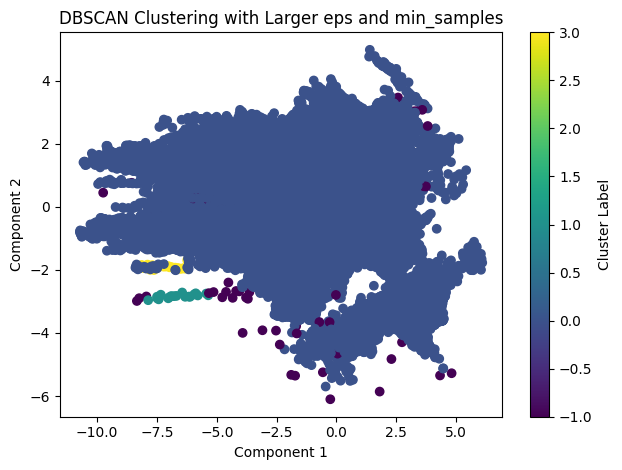

Количество сформированных кластеров: 4
Количество точек в кластере 0: 153625
Количество точек в кластере 1: 20
Количество точек в кластере 2: 57
Количество точек в кластере 3: 46
Количество точек в кластере -1: 84
Количество точек вне кластеров: 84
Cluster 0
                   0              1              2              3
count  153625.000000  153625.000000  153625.000000  153625.000000
mean       -0.409930       0.111991       0.069445       0.353897
std         2.285896       1.493768       1.157278       1.407302
min       -10.719689      -5.698605      -2.440444      -2.737827
25%        -2.024728      -0.892998      -0.679344      -0.502159
50%        -0.474327      -0.071624      -0.082366       0.262112
75%         1.605080       1.409077       0.779575       1.036407
max         6.089476       4.979623       5.206120       9.239834
Cluster 1
               0          1          2          3
count  20.000000  20.000000  20.000000  20.000000
mean   -6.644866  -2.836320   3.79683

In [30]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN

# Предполагая, что 'comp' — ваш исходный набор данных
l = int(len(comp) / 2 * 0.8)
chunk = comp[l: -l]

# Обучение модели на 'chunk' с увеличенным eps и min_samples
### !!!!!!!
model = DBSCAN(eps=0.9, min_samples=10)  # Увеличиваем eps и min_samples для более крупных кластеров
model.fit(chunk)

# Сохранение модели, если необходимо
# with open('country-house-dbscan-2.bin', 'wb') as file:
#     pickle.dump(model, file)

# Построение графика кластеров
plt.figure()
plt.scatter(chunk[:, 0], chunk[:, 1], c=model.labels_, cmap='viridis')
plt.title('DBSCAN Clustering with Larger eps and min_samples')
plt.colorbar(label='Cluster Label')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Анализ кластеров
nclusters = set(model.labels_)
print('Количество сформированных кластеров:', len(nclusters) - 1)
for j in nclusters:
    print(f'Количество точек в кластере {j}: {sum(model.labels_ == j)}')

print('Количество точек вне кластеров:', sum(model.labels_ == -1))

# Выведем статистические параметры по каждому кластеру
# Используем тот же набор данных, который использовался для обучения модели (chunk)
for j in nclusters:
    if j != -1:  # Исключаем шум
        print(f'Cluster {j}')
        cluster = chunk[model.labels_ == j]  # Используем chunk для выбора точек кластера
        cluster_df = pd.DataFrame(cluster)  # Создаем DataFrame для удобного анализа
        print(cluster_df.describe())

# Получение описательной статистики для конкретных кластеров
if 0 in nclusters:
    cluster1 = chunk[model.labels_ == 0]
    cluster1data = pd.DataFrame(cluster1).describe()
if 1 in nclusters:
    cluster2 = chunk[model.labels_ == 1]
    cluster2data = pd.DataFrame(cluster2).describe()
if 2 in nclusters:
    cluster3 = chunk[model.labels_ == 2]
    cluster3data = pd.DataFrame(cluster3).describe()

if -1 in nclusters:
    nocluster = chunk[model.labels_ == -1]
    noclusterdata = pd.DataFrame(nocluster).describe()


## Другая модель